# **Testing data pipelines**

- Like all other code, it's important to test a data pipeline before using it in a production setting. 
- Not only will validating a pipeline ensure that data is properly extracted, transformed and loaded, it will also help to limit maintenance efforts after deployment. 
- Taking the time to validate a data pipeline helps to identify and remedy data quality issues, which in turn improves data reliability. 
- Despite all the benefits that come with testing a data pipeline, not all Data Engineers take the time to do so. 
- When building a data pipeline, testing may be difficult, due to source system dependencies or changing data. 
- To help take the mystery out of the testing process, we'll explore both end-to-end testing and "checkpoint" validation in this lesson. 
- Later, we'll dig into unit testing.

**Data pipelines should be thoroughly tested**

- Validate that data is extracted, transformed, and loaded as expected

**Validating pipelines' limits maintenance efforts after deployment**

- Identify and fix data quality issues
- Improves data reliability

**Tools and techniques to test data pipelines**

- End-to-end testing
- Validating data at "checkpoints"
- Unit testing

# **Testing and production environments**

- Before we discuss data pipeline testing any further, we'll differentiate between testing and production environments. 
- Testing and production environments are common tools in both data and software engineering. 
- When building a data pipeline, testing environments allow Data Engineers to make changes and work with sample data without worrying about breaking a data source that data consumers may use. 
- In a testing environment, data does not need to be production-grade, and developers are free to experiment when building new solutions.

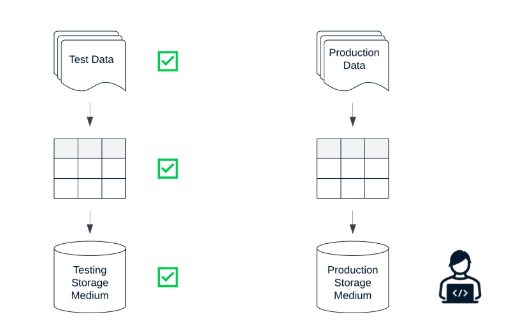

# **Testing a pipeline end-to-end**

- End-to-end testing is one of the best ways to validate data pipeline performance. 
- When testing a pipeline end-to-end, sample data should be extracted, transformed, and loaded in a testing environment, just as it would in production. 
- This helps to ensure that a pipeline runs on repeated attempts, and allows a Data Engineer to validate data at checkpoints throughout the pipeline, both during and after execution. 
- Documenting end-to-end performance allows a Data Engineer to engage in peer review, and incorporate feedback into the pipeline. 
- It also allows test data to be made available to data consumers, which helps validate access and satisfaction with the solution.

**End-to-end testing**

- Confirm that pipeline runs on repeated attempts
- Validate data at pipeline checkpoints
- Engage in peer review, incorporate feedback
- Ensure consumer access and satisfaction with solution

# **Validating pipeline checkpoints**

- As the data moves through a pipeline, it's essential to ensure information is not lost. 
- One of the best ways to do this is by validating data at a "checkpoint". 
- A "checkpoint" exists between or after components in a data pipeline, such as between the "extract" and "transform" components of a data pipeline, or after data's been loaded. 
- In our example, we'll explore the checkpoint that exists after data's loaded. 
- Here, the load function writes the clean_stock_data DataFrame to a Postgres database. 
- To ensure this data is loaded correctly, we'll create a DataFrame called loaded_data that queries all records from the clean_stock_data table. 
- We can then check the shape of the DataFrame, and output the first few rows to perform a quick spot-check on the data. 
- While simple, this helps to validate that the data can be readily queried, and ensures there are no major issues with the loaded data.

In [ ]:
# Extract, transform, and load data as part of a pipeline
...

# Take a look at the data made available in a Postgres database
loaded_data = pd.read_sql("SELECT * FROM clean_stock_data", con=db_engine)
print(loaded_data.shape)

(6438, 4)

In [ ]:
print(loaded_data.head())

In [ ]:
         timestamps      volume      open       close
1997-05-15 13:30:00  1443120000  0.121875    0.097917
1997-05-16 13:30:00  294000000   0.098438    0.086458
1997-05-19 13:30:00  122136000   0.088021    0.085417

# **Validating DataFrames**

- In addition to these checks, we can also validate that the loaded_data and clean_stock_data DataFrames are equal. 
- To do this, we call the dot-equals method on the clean_stock_data DataFrame, and pass the loaded_data DataFrame to it. 
- If the two DataFrames are equal, True is returned. Otherwise, the return value will be False. 
- This is a great tool to ensure no data was lost when data was loaded to the Postgres database.

In [ ]:
# Extract, transform, and load data, as part of a pipeline
...

# Take a look at the data made available in a Postgres database
Loaded_data = pd.read_sql("SELECT * FROM clean_stock_data", con=db_engine)

# Compare the two DataFrames.
print(clean_stock_data.equals(loaded_data))

True